# Jammer Classification: Example Notebook to Test different modeles!
### Step1: Import All Dependencies!

In [2]:
# Import tensor flow and keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
# tensorflow hub is used to load the models
!pip install -q tensorflow_hub
import tensorflow_hub as hub

import numpy as np

# Import Matplot lib, Library to plot the results and graphs
import matplotlib.pylab as plt 

# Argument parser to set variables
import options

# import dataloader
from util import dataLoader

### Step2: Setup all Required Variables

##### Delete sys.argv(req for ipython Kernels) and 

In [3]:
# Try to parse Argument from options.py
import sys; sys.argv=['']; del sys
args = options.parseArguments()

#Set the mode to test
args.mode= "test"

# Set the Dataset Directory
args.input_dir = "/media/aadmin/SamsungSSD/PROJECT-DATA/SIGENCE/Train_Val_Test/dataset/"

# Set the image Dimensions and batch size according to the trained model
args.img_h = args.img_w = 299
args.batch_size = 50

# Set the load directory, where trained models and graphs are saved
args.load_dir = "./Keras_tfHub_Model/"



### Step3: Run the code cell below without any modifications!
#### It automatically loads the test data and the trained model for Evaluation/Inference!

Initializing DataLoader ...
Looking for the data at --> /media/aadmin/SamsungSSD/PROJECT-DATA/SIGENCE/Train_Val_Test/dataset/
Evaluation mode
Found 2749 images belonging to 2 classes.
Instructions for updating:
The experimental save and load functions have been  deprecated. Please switch to `tf.keras.models.load_model`.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              21802784  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________
['01_Chirpjammersignals' '04_Narrowbandsignals']

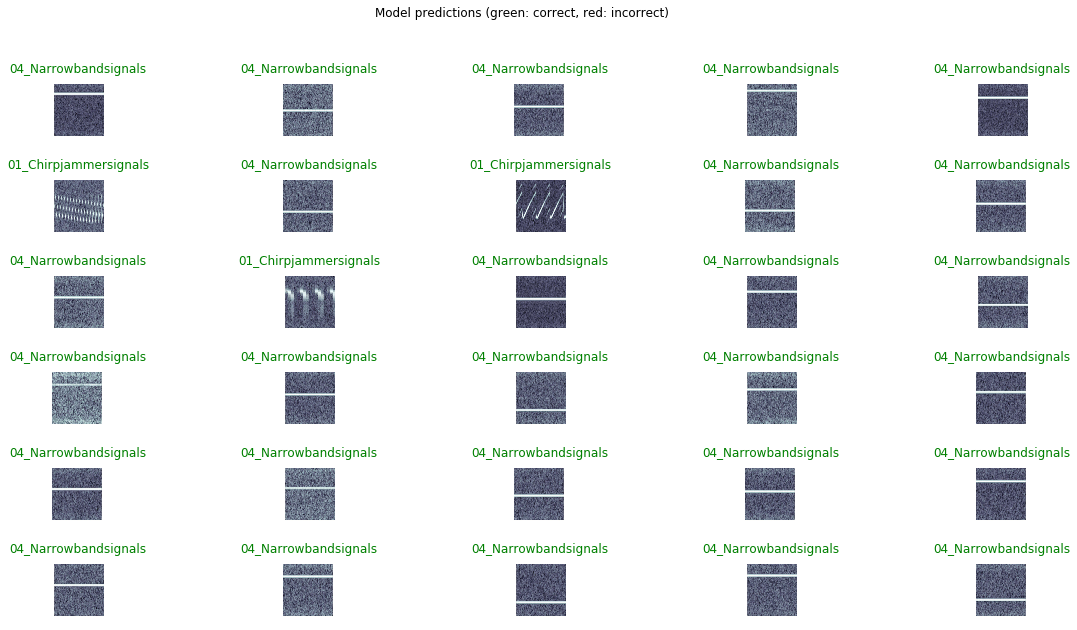

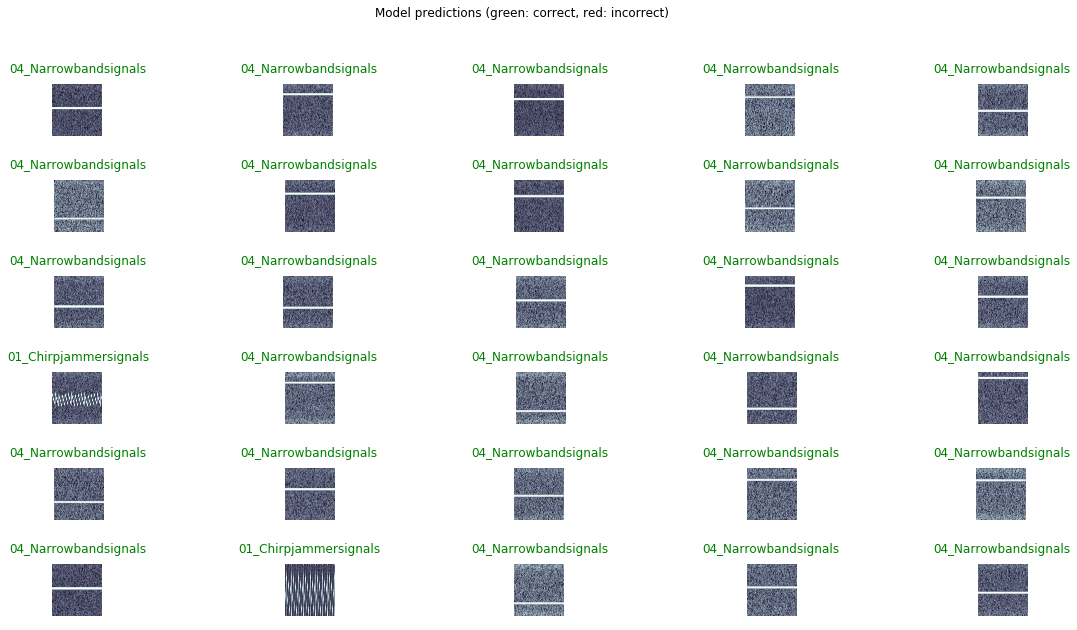

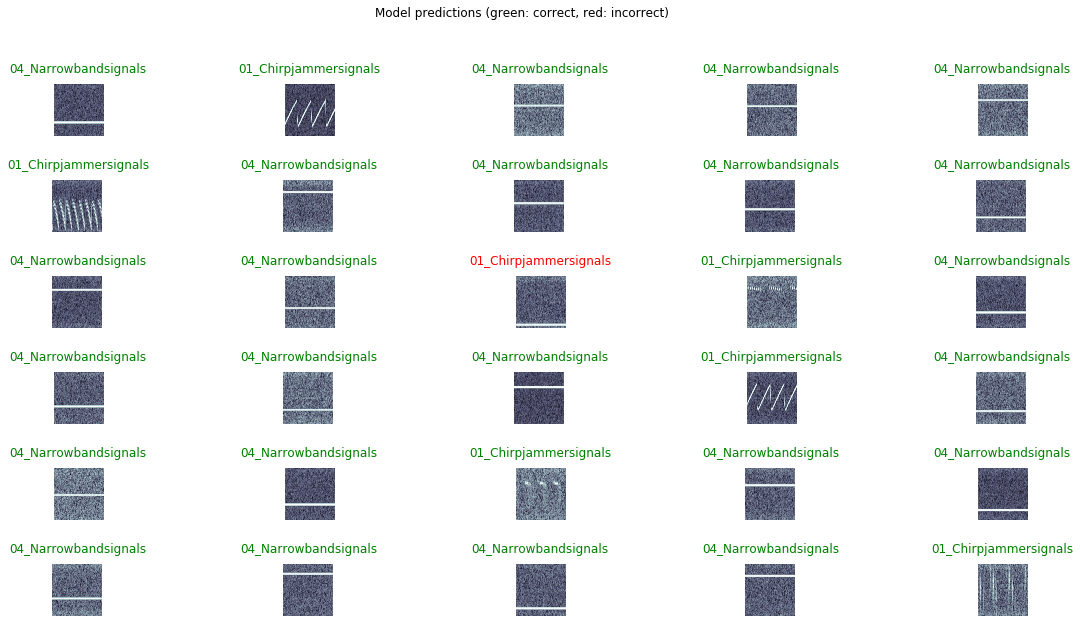

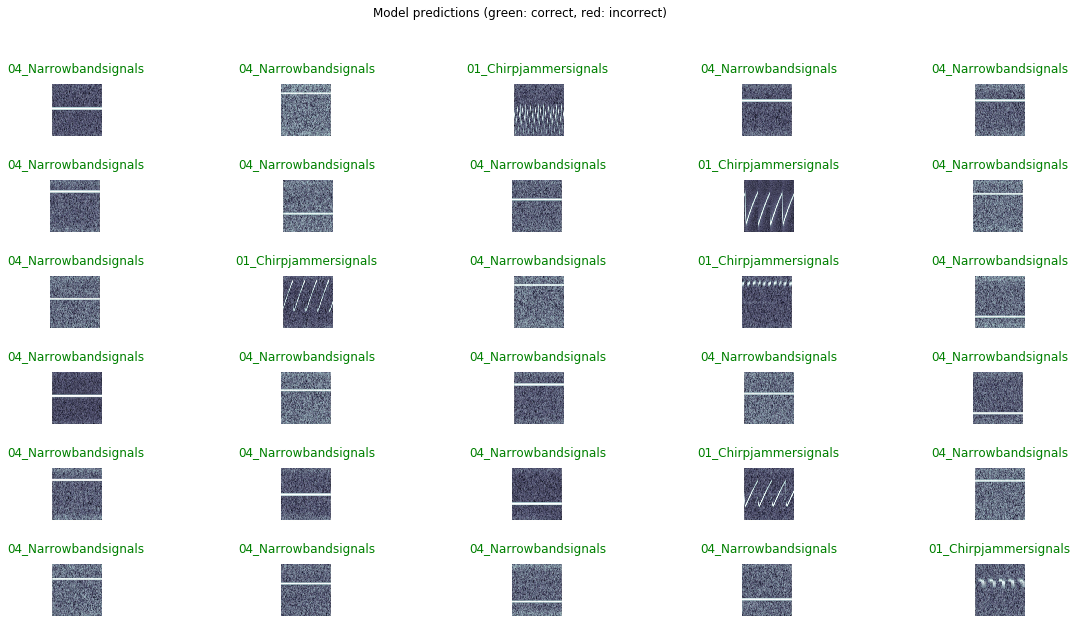

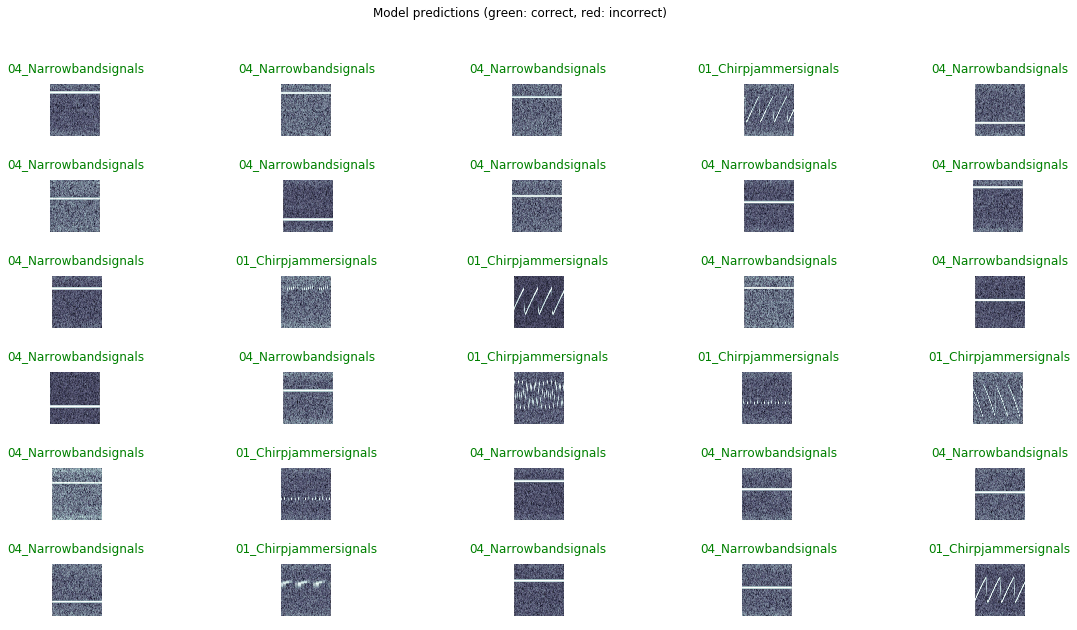

KeyboardInterrupt: 

In [4]:
dataloader = dataLoader.DataLoader(args)
test_data_gen = dataloader.dataGenerator()


reloaded = keras.experimental.load_from_saved_model(args.load_dir, custom_objects={'KerasLayer':hub.KerasLayer})
reloaded.summary()

class_names = sorted(test_data_gen.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])

print(class_names)

#Do the prediction of batches
for image_batch, label_batch in test_data_gen:
    predicted_batch = reloaded.predict(image_batch)
    predicted_id = np.argmax(predicted_batch, axis=-1)
    predicted_label_batch = class_names[predicted_id]

    # Actual label id
    label_id = np.argmax(label_batch, axis=-1)

    plt.figure(figsize=(20,10))
    plt.subplots_adjust(hspace=0.5)
    for n in range(30):
        plt.subplot(6,5,n+1)
        plt.imshow(image_batch[n])
        color = "green" if predicted_id[n] == label_id[n] else "red"
        plt.title(predicted_label_batch[n].title(), color=color)
        plt.axis('off')
        _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")
    plt.show()
